Aaron Wang

ECE 2795 Final Exam - AI and ML Application in Power Systems

December 2024

**Time Series Prediction Using Neural Networks**

Problem Description:

We are provided with a time series dataset.

We have two signals, Ot and Rt.

Resolution of 15-minute intervals.

Period of 11 months.

Develop and Compare Predictive models for both signals (Ot and Rt) using four different neural network architectures: RNN, LSTM, GRU, and Transformers.

There are two Signals Ot and Rt. We will begin the code with the preprocessing of the data. Then we will run the four model types, two models for each type, so there will be eight total models.

In [ ]:
# Imports

import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Will print True if CUDA is available


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt



from datetime import datetime

2.5.1+cu121
False


In [ ]:
import numpy as np
import pandas as pd

# Read in the dataset
data = pd.read_csv('timeseries_data_2024.csv', parse_dates=['date'])
print(data)

data2 = pd.read_csv('timeseries_data_2024.csv')
print(data2)


            date      hour  minute  Ot  Rt
0     2023-10-01   1:00 AM       0   0   0
1     2023-10-01   1:00 AM      15   0   0
2     2023-10-01   1:00 AM      30  12   0
3     2023-10-01   1:00 AM      45   0   0
4     2023-10-01   2:00 AM       0   0   0
...          ...       ...     ...  ..  ..
32347 2024-09-01  11:00 PM      45   3   3
32348 2024-09-01  12:00 PM       0   8   4
32349 2024-09-01  12:00 PM      15   0   5
32350 2024-09-01  12:00 PM      30   0   3
32351 2024-09-01  12:00 PM      45   0   0

[32352 rows x 5 columns]
          date      hour  minute  Ot  Rt
0      10/1/23   1:00 AM       0   0   0
1      10/1/23   1:00 AM      15   0   0
2      10/1/23   1:00 AM      30  12   0
3      10/1/23   1:00 AM      45   0   0
4      10/1/23   2:00 AM       0   0   0
...        ...       ...     ...  ..  ..
32347   9/1/24  11:00 PM      45   3   3
32348   9/1/24  12:00 PM       0   8   4
32349   9/1/24  12:00 PM      15   0   5
32350   9/1/24  12:00 PM      30   0   3
32351  

<ipython-input-18-1af5f358e27c>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('timeseries_data_2024.csv', parse_dates=['date'])


In [ ]:
# Preprocessing Data

# Properly split and preprocess the data. Here, we use a split of 20% Testing Data and 80% Training Data.

# Combine 'hour' and 'minute' columns into a valid time string with the correct format
data['time'] = data.apply(
    lambda row: f"{row['hour'].split()[0].replace(':00', '')}:{str(row['minute']).zfill(2)} {row['hour'].split()[1]}"
    if row['minute'] != 0 else f"{row['hour'].split()[0].replace(':00', '')}:00 {row['hour'].split()[1]}", axis=1)



print(data['time'])

print(data)

# Combine the date and the time_string
data['combined_datetime'] = data['date'].astype(str) + ' ' + data['time']

# Convert the combined column into a datetime object
data['time_series'] = pd.to_datetime(data['combined_datetime'], format='%Y-%m-%d %I:%M %p')


Ot = data['Ot']

Rt = data['Rt']


0         1:00 AM
1         1:15 AM
2         1:30 AM
3         1:45 AM
4         2:00 AM
           ...   
32347    11:45 PM
32348    12:00 PM
32349    12:15 PM
32350    12:30 PM
32351    12:45 PM
Name: time, Length: 32352, dtype: object
            date      hour  minute  Ot  Rt      time
0     2023-10-01   1:00 AM       0   0   0   1:00 AM
1     2023-10-01   1:00 AM      15   0   0   1:15 AM
2     2023-10-01   1:00 AM      30  12   0   1:30 AM
3     2023-10-01   1:00 AM      45   0   0   1:45 AM
4     2023-10-01   2:00 AM       0   0   0   2:00 AM
...          ...       ...     ...  ..  ..       ...
32347 2024-09-01  11:00 PM      45   3   3  11:45 PM
32348 2024-09-01  12:00 PM       0   8   4  12:00 PM
32349 2024-09-01  12:00 PM      15   0   5  12:15 PM
32350 2024-09-01  12:00 PM      30   0   3  12:30 PM
32351 2024-09-01  12:00 PM      45   0   0  12:45 PM

[32352 rows x 6 columns]


# 1. Implementing and Training Recurrent Neural Networks (RNN)

In [ ]:
# 1. Implementing and Training Recurrent Neural Networks (RNN)

# Making two neural networks for Rt and Ot, to predict the Rt and Ot values.

X = data['time_series'].view('int64') / 10**9  # Convert to seconds


X = torch.tensor(X.values, dtype=torch.float32).unsqueeze(-1)  # Adding feature dimension
Ot = torch.tensor(Ot.values, dtype=torch.float32)
Rt = torch.tensor(Rt.values, dtype=torch.float32)


<ipython-input-20-a1a3ff42156e>:5: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X = data['time_series'].view('int64') / 10**9  # Convert to seconds


In [ ]:
# Splitting Data into Training and Testing Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data and transform both training and test sets
X_train, X_test, Ot_train, Ot_test, Rt_train, Rt_test = train_test_split(X, Ot, Rt, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Adding feature dimension
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)  # Adding feature dimension
Ot_train = torch.tensor(Ot_train, dtype=torch.float32)
Ot_test = torch.tensor(Ot_test, dtype=torch.float32)
Rt_train = torch.tensor(Rt_train, dtype=torch.float32)
Rt_test = torch.tensor(Rt_test, dtype=torch.float32)

<ipython-input-21-e7797b932661>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Adding feature dimension
<ipython-input-21-e7797b932661>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)  # Adding feature dimension
<ipython-input-21-e7797b932661>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Ot_train = torch.tensor(Ot_train, dtype=torch.float32)
<ipython-input-21-e7797b932661>:20: UserWarning: To cop

In [ ]:
# Creating DataLoader for both Ot and Rt
batch_size = 32
train_data_Ot = TensorDataset(X_train, Ot_train)

train_data_Rt = TensorDataset(X_train, Rt_train)

train_dl_Ot = DataLoader(dataset = train_data_Ot, batch_size = batch_size, shuffle = True,num_workers = 2)

train_dl_Rt = DataLoader(dataset = train_data_Rt, batch_size = batch_size, shuffle = True,num_workers = 2)

test_dl_Ot = DataLoader(dataset = train_data_Ot,batch_size = batch_size,shuffle = True,num_workers = 2)

test_dl_Rt = DataLoader(dataset = train_data_Rt,batch_size = batch_size,shuffle = True,num_workers = 2)



In [ ]:
# Define the Ot RNN model
class OtRNN(nn.Module):
    def __init__(self, input_feature=1, hidden_size=256, num_layer=2):
        super(OtRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layer = num_layer
        self.rnn = nn.GRU(input_feature, hidden_size, num_layer, batch_first=True).to(device)
        self.fc1 = nn.Linear(in_features=hidden_size, out_features=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc1(out[:, -1, :])
        return out


# Define the Rt RNN model
class RtRNN(nn.Module):
    def __init__(self, input_feature=1, hidden_size=256, num_layer=2):
        super(RtRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layer = num_layer
        self.rnn = nn.GRU(input_feature, hidden_size, num_layer, batch_first=True).to(device)
        self.fc1 = nn.Linear(in_features=hidden_size, out_features=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc1(out[:, -1, :])
        return out



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the Ot model
modelOt = OtRNN().to(device)

# Instantiate the Rt model
modelRt = RtRNN().to(device)



In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(modelRt.parameters(), lr=0.001)

# Initialize the list to store training losses
RNN_train_loss_Ot_history = []
RNN_train_loss_Rt_history = []

# Initialize the list to store testing losses
RNN_test_loss_Ot_history = []
RNN_test_loss_Rt_history = []

In [ ]:
# Training the Ot model
epochs = 10
modelOt.train()
for epoch in range(epochs):
    for xb, yb in train_dl_Ot:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
        pred = modelOt(xb)
        RNN_train_loss_Ot = criterion(pred.squeeze(), yb)
        RNN_train_loss_Ot.backward()
        optimizer.step()
    RNN_train_loss_Ot_history.append(RNN_train_loss_Ot.item())  # Store loss value
    print(f'Epoch {epoch+1}, Loss: {RNN_train_loss_Ot.item()}')

    # Call the evaluate function
    evaluate_model_Ot(modelOt, test_dl_Ot)

# Training the Rt model
epochs = 10
modelRt.train()
for epoch in range(epochs):
    for xb, yb in train_dl_Rt:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
        pred = modelRt(xb)
        RNN_train_loss_Rt = criterion(pred.squeeze(), yb)
        RNN_train_loss_Rt.backward()
        optimizer.step()
    RNN_train_loss_Rt_history.append(RNN_train_loss_Rt.item())  # Store loss value
    print(f'Epoch {epoch+1}, Loss: {RNN_train_loss_Rt.item()}')

    # Call the evaluate function
    evaluate_model_Rt(modelRt, test_dl_Rt)

# Model evaluation (implement as needed)
# ...

Epoch 1, Loss: 75.38011169433594
Mean Squared Error on Test Set: 39.643629874956716
Epoch 2, Loss: 35.92747497558594
Mean Squared Error on Test Set: 39.64362990608555
Epoch 3, Loss: 84.31600189208984
Mean Squared Error on Test Set: 39.64362982213203
Epoch 4, Loss: 19.20322036743164
Mean Squared Error on Test Set: 39.643629830621705
Epoch 5, Loss: 33.48204040527344
Mean Squared Error on Test Set: 39.6436299315546
Epoch 6, Loss: 42.377037048339844
Mean Squared Error on Test Set: 39.64362983203665
Epoch 7, Loss: 77.21260070800781
Mean Squared Error on Test Set: 39.64362975515786
Epoch 8, Loss: 33.12541580200195
Mean Squared Error on Test Set: 39.64362968346721
Epoch 9, Loss: 70.10363006591797
Mean Squared Error on Test Set: 39.64362982920676
Epoch 10, Loss: 54.57408905029297
Mean Squared Error on Test Set: 39.6436297834568
Epoch 1, Loss: 20.20465660095215
Mean Squared Error on Test Set: 24.762203974492706
Epoch 2, Loss: 16.81334686279297
Mean Squared Error on Test Set: 24.761353769358966


In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
Ot_test = torch.tensor(Ot_test, dtype=torch.float32)

test_data = TensorDataset(X_test, Ot_test)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=False)


<ipython-input-117-d9a3d7f91714>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
<ipython-input-117-d9a3d7f91714>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Ot_test = torch.tensor(Ot_test, dtype=torch.float32)


In [ ]:
def evaluate_model_Ot(modelOt, test_dl_Ot):
    modelOt.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No need to track gradients
        for xb, yb in test_dl_Ot:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
            predictions = modelOt(xb)
            RNN_test_loss_Ot = criterion(predictions.squeeze(), yb)
            total_loss += RNN_test_loss_Ot.item()

    avg_loss = total_loss / len(test_dl_Ot)
    RNN_test_loss_Ot_history.append(avg_loss)  # Store loss value
    print(f'Mean Squared Error on Test Set: {avg_loss}')



def evaluate_model_Rt(modelRt, test_dl_Rt):
    modelRt.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No need to track gradients
        for xb, yb in test_dl_Rt:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
            predictions = modelRt(xb)
            RNN_test_loss_Rt = criterion(predictions.squeeze(), yb)
            total_loss += RNN_test_loss_Rt.item()

    avg_loss = total_loss / len(test_dl_Rt)
    RNN_test_loss_Rt_history.append(avg_loss)  # Store loss value
    print(f'Mean Squared Error on Test Set: {avg_loss}')



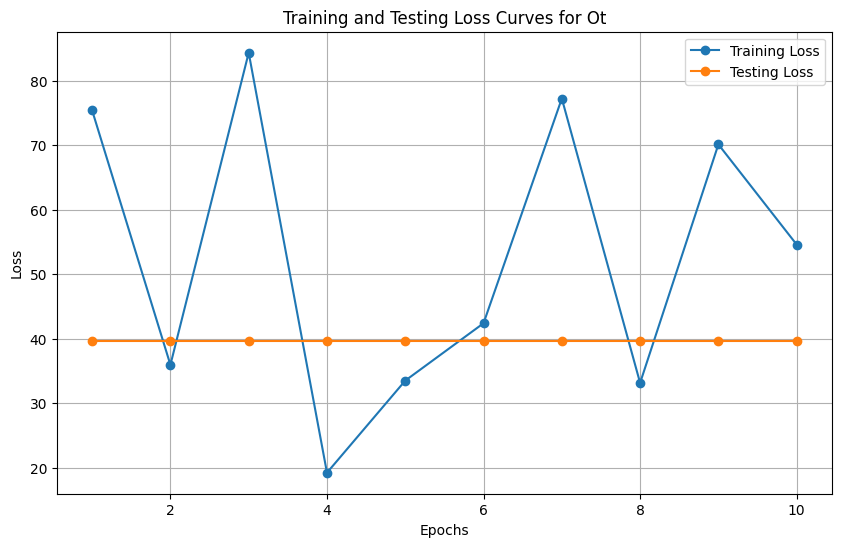

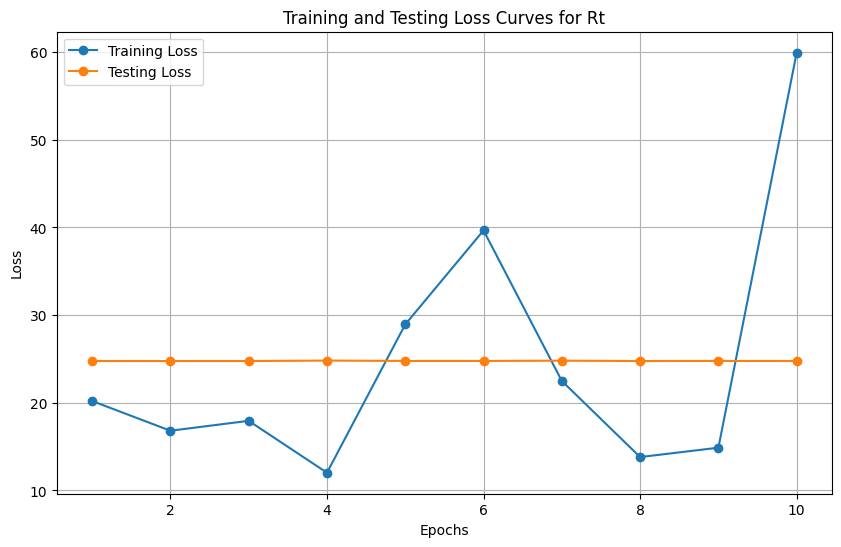

In [ ]:
# Training and Testing Loss Curves For Model #1 (RNN)

# Plotting for Ot
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), RNN_train_loss_Ot_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), RNN_test_loss_Ot_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves for Ot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plotting for Rt
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), RNN_train_loss_Rt_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), RNN_test_loss_Rt_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves for Rt')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 2. Implementing and Training LSTM

In [ ]:
# 2. Implementing and Training LSTM


# Creating DataLoader for both Ot and Rt
batch_size = 32

train_data_Ot = TensorDataset(X, Ot)
train_data_Rt = TensorDataset(X, Rt)

train_dl_Ot = DataLoader(train_data_Ot, batch_size=batch_size, shuffle=True)

train_dl_Rt = DataLoader(train_data_Rt, batch_size=batch_size, shuffle=True)


test_dl_Ot=DataLoader(dataset=train_data_Ot,batch_size=batch_size,shuffle=True,num_workers=2)

test_dl_Rt=DataLoader(dataset=train_data_Rt,batch_size=batch_size,shuffle=True,num_workers=2)

# Define the Ot LSTM model
class OtLSTM(nn.Module):
    def __init__(self, input_feature=1, hidden_size=256, num_layer=2):
        super(OtLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layer = num_layer
        self.lstm = nn.LSTM(input_feature, hidden_size, num_layer, batch_first=True)
        self.fc1 = nn.Linear(in_features=hidden_size, out_features=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).to(xb.device)
        c0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).to(xb.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc1(out[:, -1, :])
        return out

# Define the Rt LSTM model
class RtLSTM(nn.Module):
    def __init__(self, input_feature=1, hidden_size=256, num_layer=2):
        super(RtLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layer = num_layer
        self.lstm = nn.LSTM(input_feature, hidden_size, num_layer, batch_first=True)
        self.fc1 = nn.Linear(in_features=hidden_size, out_features=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).to(xb.device)
        c0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).to(xb.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc1(out[:, -1, :])
        return out

# Instantiate the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modelRtLSTM = RtLSTM().to(device)
modelOtLSTM = OtLSTM().to(device)

In [205]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(modelOt.parameters(), lr=0.001)

# Initialize the list to store training losses
LSTM_train_loss_Ot_history = []
LSTM_train_loss_Rt_history = []

# Initialize the list to store testing losses
LSTM_test_loss_Ot_history = []
LSTM_test_loss_Rt_history = []

In [206]:
for m in modelOt.parameters():
    print(m.device) #return cuda:0
if torch.cuda.is_available():
    model = modelOt.cuda()

# Training the models
epochs = 10
modelOt.train()


for epoch in range(epochs):
    for xb, yb in train_dl_Ot:
        xb, yb = xb.to(device), yb.to(device)

        xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
        optimizer.zero_grad()
        pred = modelOt(xb)
        LSTM_train_loss_Ot = criterion(pred.squeeze(), yb)
        LSTM_train_loss_Ot.backward()
        optimizer.step()
    LSTM_train_loss_Ot_history.append(LSTM_train_loss_Ot.item())  # Store loss value
    print(f'Epoch {epoch+1}, Loss: {LSTM_train_loss_Ot.item()}')

    # Call the evaluate function for Ot model
    evaluate_model_Ot(modelOt, test_dl_Ot)




cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Epoch 1, Loss: 31.916736602783203
Mean Squared Error on Test Set: 50.60986599417516
Epoch 2, Loss: 48.38041305541992
Mean Squared Error on Test Set: 50.60986605265963
Epoch 3, Loss: 59.861244201660156
Mean Squared Error on Test Set: 50.609865881922694
Epoch 4, Loss: 30.569805145263672
Mean Squared Error on Test Set: 50.60986595090136
Epoch 5, Loss: 11.105917930603027
Mean Squared Error on Test Set: 50.6098659965334
Epoch 6, Loss: 33.632232666015625
Mean Squared Error on Test Set: 50.609866064097126
Epoch 7, Loss: 61.39611053466797
Mean Squared Error on Test Set: 50.609865895364685
Epoch 8, Loss: 45.79805374145508
Mean Squared Error on Test Set: 50.6098659892818
Epoch 9, Loss: 24.68802261352539
Mean Squared Error on Test Set: 50.60986590574097
Epoch 10, Loss: 65.65006256103516
Mean Squared Error on Test Set: 50.60986599659236


In [ ]:
# Reinitialize model and optimizer for 'Rt'

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(modelRt.parameters(), lr=0.001)




In [ ]:
epochs = 10
modelRt.train()
for epoch in range(epochs):
    for xb, yb in train_dl_Rt:
        xb, yb = xb.to(device), yb.to(device)
        xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
        optimizer.zero_grad()
        pred = modelRt(xb)
        LSTM_train_loss_Rt = criterion(pred.squeeze(), yb)
        LSTM_train_loss_Rt.backward()
        optimizer.step()
    LSTM_train_loss_Rt_history.append(LSTM_train_loss_Rt.item())  # Store loss value
    print(f'Epoch {epoch+1}, Loss: {LSTM_train_loss_Rt.item()}')

    # Call the evaluate function for Rt model
    evaluate_model_Rt(modelRt, test_dl_Rt)


# Model evaluation (implement as needed)
# ...

Epoch 1, Loss: 31.04865074157715
Mean Squared Error on Test Set: 24.792474405466038
Epoch 2, Loss: 12.440696716308594
Mean Squared Error on Test Set: 24.76171870707994
Epoch 3, Loss: 64.06307983398438
Mean Squared Error on Test Set: 24.855696896535118
Epoch 4, Loss: 9.232152938842773
Mean Squared Error on Test Set: 24.77501484241731
Epoch 5, Loss: 12.344490051269531
Mean Squared Error on Test Set: 24.77805608009844
Epoch 6, Loss: 71.21316528320312
Mean Squared Error on Test Set: 24.778148843791673
Epoch 7, Loss: 34.61156463623047
Mean Squared Error on Test Set: 24.764215424553694
Epoch 8, Loss: 20.361814498901367
Mean Squared Error on Test Set: 24.77476934155654
Epoch 9, Loss: 16.832963943481445
Mean Squared Error on Test Set: 24.766543265266304
Epoch 10, Loss: 19.701513290405273
Mean Squared Error on Test Set: 24.894333733767123


In [ ]:
def evaluate_model_Ot(model, test_dl_Ot):
    modelOt.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No need to track gradients
        for xb, yb in test_dl_Ot:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
            predictions = model(xb)
            LSTM_loss_val_Ot = criterion(predictions.squeeze(), yb)
            total_loss += LSTM_loss_val_Ot.item()
    avg_loss = total_loss / len(test_dl_Rt)
    LSTM_test_loss_Ot_history.append(avg_loss)  # Store loss value
    print(f'Mean Squared Error on Test Set: {avg_loss}')

def evaluate_model_Rt(model, test_dl_Rt):
    modelRt.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No need to track gradients
        for xb, yb in test_dl_Rt:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
            predictions = model(xb)
            LSTM_loss_val_Rt = criterion(predictions.squeeze(), yb)
            total_loss += LSTM_loss_val_Rt.item()
    avg_loss = total_loss / len(test_dl_Rt)
    LSTM_test_loss_Rt_history.append(avg_loss)  # Store loss value
    print(f'Mean Squared Error on Test Set: {avg_loss}')



















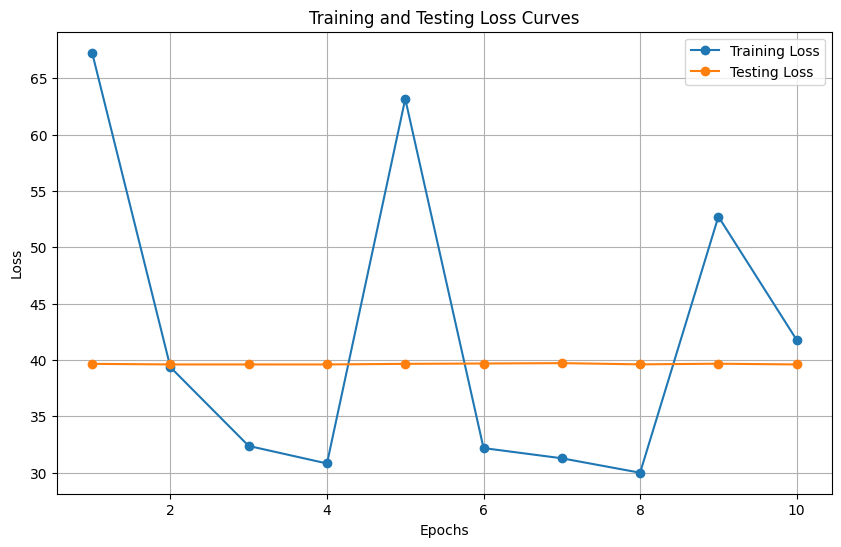

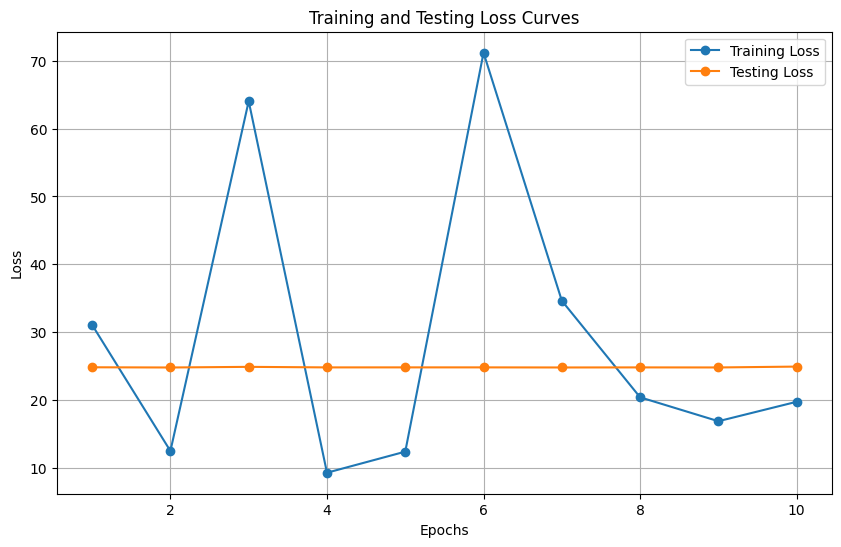

In [ ]:
# Training and Testing Loss Curves For Model #2 (LSTM)

# Plotting for Ot
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), LSTM_train_loss_Ot_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), LSTM_test_loss_Ot_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plotting for Rt
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), LSTM_train_loss_Rt_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), LSTM_test_loss_Rt_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 3. Implementing and Training GRU


# Define the GRU models

class OtGRU(nn.Module):

    def __init__(self, input_feature=1, hidden_size=256, num_layer=2):

        super(OtGRU, self).__init__()

        self.hidden_size = hidden_size

        self.num_layer = num_layer

        # Replace RNN with GRU

        self.rnn = nn.GRU(input_feature, hidden_size, num_layer, batch_first=True)

        self.fc1 = nn.Linear(in_features=hidden_size, out_features=1)



    def forward(self, x):

        # Initialize hidden state for GRU

        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size)

        out, _ = self.rnn(x, h0)

        out = self.fc1(out[:, -1, :])

        return out

class RtGRU(nn.Module):

    def __init__(self, input_feature=1, hidden_size=256, num_layer=2):

        super(RtGRU, self).__init__()

        self.hidden_size = hidden_size

        self.num_layer = num_layer

        # Replace RNN with GRU

        self.rnn = nn.GRU(input_feature, hidden_size, num_layer, batch_first=True)

        self.fc1 = nn.Linear(in_features=hidden_size, out_features=1)



    def forward(self, x):

        # Initialize hidden state for GRU

        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size)

        out, _ = self.rnn(x, h0)

        out = self.fc1(out[:, -1, :])

        return out


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the Ot model
modelOtGRU = OtGRU().to(device)

# Instantiate the Rt model
modelRtGRU = RtGRU().to(device)



In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizerOt = optim.Adam(modelOtGRU.parameters(), lr=0.001)

optimizerRt = optim.Adam(modelRtGRU.parameters(), lr=0.001)

# Initialize the list to store training losses
GRU_train_loss_Ot_history = []
GRU_train_loss_Rt_history = []

# Initialize the list to store testing losses
GRU_test_loss_Ot_history = []
GRU_test_loss_Rt_history = []

In [ ]:
# Training the Ot model
epochs = 10
modelOtGRU.train()
for epoch in range(epochs):
    for xb, yb in train_dl_Ot:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
        pred = modelOtGRU(xb)
        GRU_train_loss_Ot = criterion(pred.squeeze(), yb)
        GRU_train_loss_Ot.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {GRU_train_loss_Ot.item()}')
    GRU_train_loss_Ot_history.append(GRU_train_loss_Ot.item())

    # Call the evaluate function

    evaluate_model_Ot(modelOtGRU, test_dl_Ot)



# Training the Rt model
epochs = 10
modelRtGRU.train()
for epoch in range(epochs):
    for xb, yb in train_dl_Rt:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
        pred = modelRtGRU(xb)
        GRU_train_loss_Rt = criterion(pred.squeeze(), yb)
        GRU_train_loss_Rt.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {GRU_train_loss_Rt.item()}')
    GRU_train_loss_Rt_history.append(GRU_train_loss_Rt.item())

    evaluate_model_Rt(modelRtGRU, test_dl_Rt)

# Model evaluation (implement as needed)
# ...

Epoch 1, Loss: 55.413307189941406
Mean Squared Error on Test Set: 50.6098659320354
Epoch 2, Loss: 21.830020904541016
Mean Squared Error on Test Set: 50.60986599417516
Epoch 3, Loss: 32.010955810546875
Mean Squared Error on Test Set: 50.60986575740735
Epoch 4, Loss: 63.72416687011719
Mean Squared Error on Test Set: 50.609865926493526
Epoch 5, Loss: 93.33563232421875
Mean Squared Error on Test Set: 50.60986574868184
Epoch 6, Loss: 16.176435470581055
Mean Squared Error on Test Set: 50.609865936280244
Epoch 7, Loss: 69.53175354003906
Mean Squared Error on Test Set: 50.60986590102448
Epoch 8, Loss: 66.63185119628906
Mean Squared Error on Test Set: 50.609865999938116
Epoch 9, Loss: 57.0999870300293
Mean Squared Error on Test Set: 50.60986584206835
Epoch 10, Loss: 120.08152770996094
Mean Squared Error on Test Set: 50.609865960452254
Epoch 1, Loss: 29.429340362548828
Mean Squared Error on Test Set: 36.033181365236686
Epoch 2, Loss: 76.937255859375
Mean Squared Error on Test Set: 36.03318133788

In [ ]:
def evaluate_model_Ot(modelOt, test_dl):
    modelOt.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No need to track gradients
        for xb, yb in test_dl_Ot:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
            predictions = modelOtGRU(xb)
            GRU_test_loss_Ot = criterion(predictions.squeeze(), yb)
            total_loss += GRU_test_loss_Ot.item()
    avg_loss = total_loss / len(test_dl)
    print(f'Mean Squared Error on Test Set: {avg_loss}')
    GRU_test_loss_Ot_history.append(avg_loss)

def evaluate_model_Rt(modelRt, test_dl_Rt):
    modelRt.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No need to track gradients
        for xb, yb in test_dl_Rt:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.unsqueeze(1)  # Add a sequence dimension if the input is 2D (batch_size, input_size)
            predictions = modelRtGRU(xb)
            GRU_test_loss_Rt = criterion(predictions.squeeze(), yb)
            total_loss += GRU_test_loss_Rt.item()
    avg_loss = total_loss / len(test_dl_Rt)
    print(f'Mean Squared Error on Test Set: {avg_loss}')
    GRU_test_loss_Rt_history.append(avg_loss)



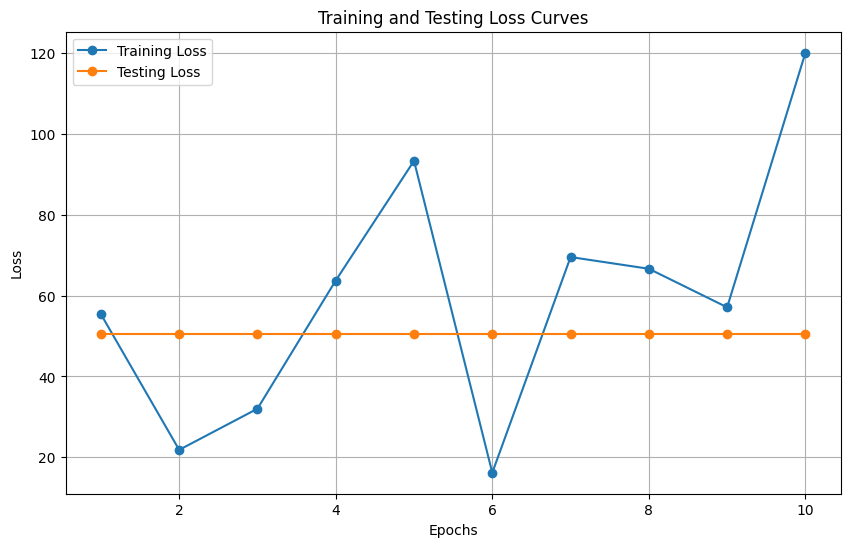

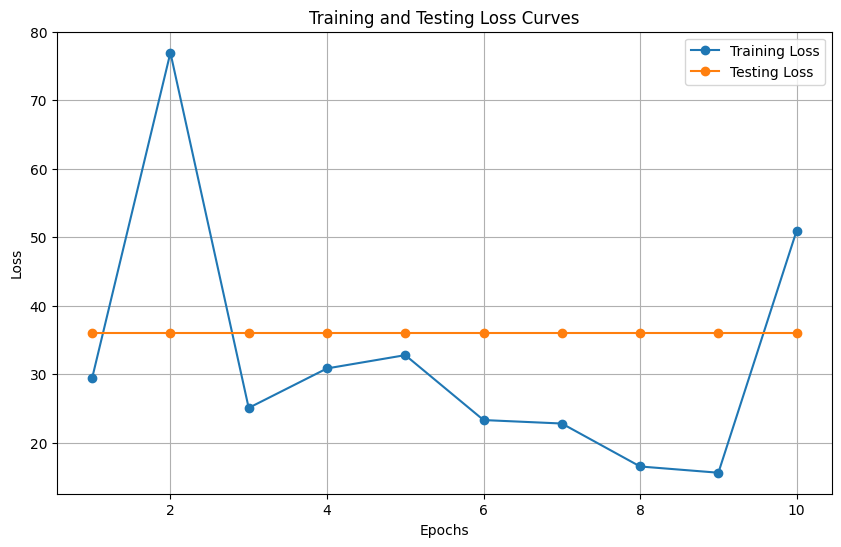

In [ ]:
# Training and Testing Loss Curves For Model 3 (GRU)

# Plotting for Ot
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), GRU_train_loss_Ot_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), GRU_test_loss_Ot_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plotting for Rt
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), GRU_train_loss_Rt_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), GRU_test_loss_Rt_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [202]:
# 4. Implementing and Training Transformers
# Initialize the list to store training losses
Transformers_train_loss_Ot_history = []
Transformers_train_loss_Rt_history = []

# Initialize the list to store testing losses
Transformers_test_loss_Ot_history = []
Transformers_test_loss_Rt_history = []

In [ ]:
#print(data)

# Fill missing values and normalize
#data.fillna(method='ffill', inplace=True)
#data_normalized = (data - data.mean()) / data.std()

# Convert to PyTorch tensor
#data_tensor = torch.tensor(data_normalized.values, dtype=torch.float32)

# Create DataLoader
batch_size = 32
dataset_Ot = TensorDataset(X_train, Ot_train)  # Input and target are the same for autoencoders
dataloader_Ot = DataLoader(dataset_Ot, batch_size=batch_size, shuffle=True)

# Define the Transformer Autoencoder
class TransformerAutoencoder(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers):
        super(TransformerAutoencoder, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_encoder_layers)
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=num_decoder_layers)
        self.input_linear = nn.Linear(input_dim, d_model)
        self.output_linear = nn.Linear(d_model, input_dim)

    def forward(self, x):
        x = self.input_linear(x)
        x = self.transformer_encoder(x)
        x = self.transformer_decoder(x, x)
        x = self.output_linear(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
d_model = 64  # Dimension of the model
nhead = 2  # Number of heads in the multiheadattention models
num_encoder_layers = 3  # Number of sub-encoder-layers in the encoder
num_decoder_layers = 3  # Number of sub-decoder-layers in the decoder

model = TransformerAutoencoder(input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Set this higher for better training results
for epoch in range(num_epochs):
    for inputs, _ in dataloader_Ot:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    test_loss = evaluate_model(model_Ot, dataloader_Ot, criterion)

    Transformers_test_loss_Ot_history.append(test_loss)

    print(f'Error on Test Set: {test_loss}')


# Anomaly Detection (implemented as needed)



Epoch 1, Loss: 2.9266327718141624e+18
Error on Test Set: 2.9264860423951657e+18
Epoch 2, Loss: 2.9369022104175903e+18
Error on Test Set: 2.926484017676442e+18
Epoch 3, Loss: 2.930440105703244e+18
Error on Test Set: 2.9264831505708564e+18
Epoch 4, Loss: 2.9234856946575606e+18
Error on Test Set: 2.9264891007091835e+18


In [ ]:
# 4. Implementing and Training Transformers

#print(data)

# Fill missing values and normalize
#data.fillna(method='ffill', inplace=True)
#data_normalized = (data - data.mean()) / data.std()

# Convert to PyTorch tensor
#data_tensor = torch.tensor(data_normalized.values, dtype=torch.float32)

# Create DataLoader
batch_size = 32
dataset_Rt = TensorDataset(X_train, Rt_train)  # Input and target are the same for autoencoders
dataloader_Rt = DataLoader(dataset_Rt, batch_size=batch_size, shuffle=True)

# Define the Transformer Autoencoder
class TransformerAutoencoder(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers):
        super(TransformerAutoencoder, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_encoder_layers)
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=num_decoder_layers)
        self.input_linear = nn.Linear(input_dim, d_model)
        self.output_linear = nn.Linear(d_model, input_dim)

    def forward(self, x):
        x = self.input_linear(x)
        x = self.transformer_encoder(x)
        x = self.transformer_decoder(x, x)
        x = self.output_linear(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
d_model = 64  # Dimension of the model
nhead = 2  # Number of heads in the multiheadattention models
num_encoder_layers = 3  # Number of sub-encoder-layers in the encoder
num_decoder_layers = 3  # Number of sub-decoder-layers in the decoder

model_Rt = TransformerAutoencoder(input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



# Training loop
num_epochs = 10  # Set this higher for better training results
for epoch in range(num_epochs):
    for inputs, _ in dataloader_Rt:
        optimizer.zero_grad()
        outputs = model_Rt(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    Transformers_train_loss_Rt_history.append(loss.item())

    test_loss = evaluate_model(model_Rt, dataloader_Rt, criterion)

    Transformers_test_loss_Rt_history.append(test_loss)

    print(f'Error on Test Set: {test_loss}')


# Anomaly Detection (implemented as needed)



In [ ]:
import torch

def evaluate_model(model, dataloader, criterion):
    """
    Evaluates the given model on the provided data.

    Parameters:
    - model: The PyTorch model to evaluate.
    - dataloader: The DataLoader for the test set.
    - criterion: The loss function to compute the loss.

    Returns:
    - average_loss: The average loss across all batches in the test set.
    """
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to accumulate the loss
    total_loss = 0
    num_batches = 0

    # Disable gradient computation for evaluation
    with torch.no_grad():
        for inputs, _ in dataloader:
            # Forward pass: Get the model's output
            outputs = model(inputs)

            # Calculate the loss for this batch
            loss = criterion(outputs, inputs)

            # Accumulate the loss
            total_loss += loss.item()
            num_batches += 1

    # Calculate the average loss over all batches
    average_loss = total_loss / num_batches
    return average_loss

In [ ]:
import numpy as np

# Define the new matrix B
A = np.array([[3, 4],
              [2, 3]])

# Perform Singular Value Decomposition
U, sigma, Vt = np.linalg.svd(A)

# Output the matrices U, sigma, and Vt
print("U matrix:")
print(U)
print("\nSigma (diagonal values):")
print(sigma)
print("\nV transposed (Vt) matrix:")
print(Vt)


In [200]:
import numpy as np

# Given values
X = np.array([[1, 2], [3, 4], [5, 6]])
Y = np.array([[1], [2], [3]])
lambda_ = 0.1

# Augmenting the feature matrix X with a column of ones to include the intercept
X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))

# Identity matrix of size 3x3 (since now we have 3 features including the intercept)
I = np.identity(3)

# Recalculating theta for Ridge Regression with the augmented matrix
theta_augmented = np.linalg.inv(X_augmented.T @ X_augmented + lambda_ * I) @ X_augmented.T @ Y

print(theta_augmented)


[[0.15477214]
 [0.17442575]
 [0.32919789]]


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

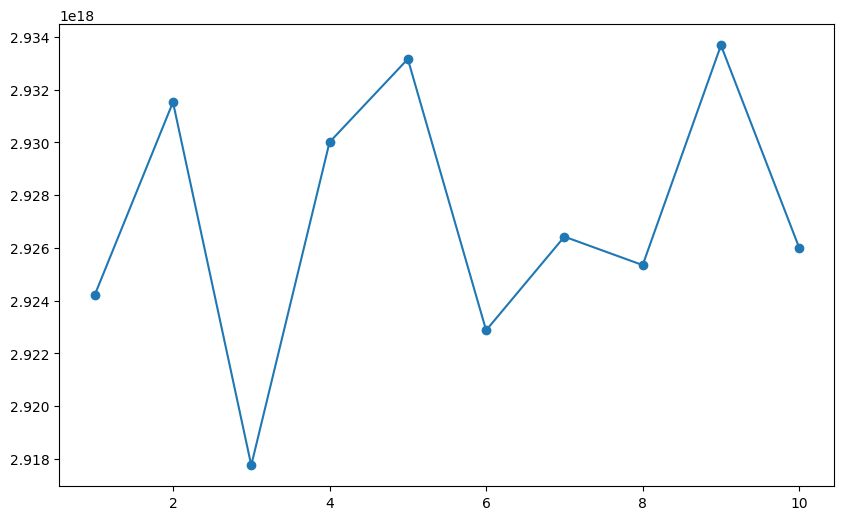

In [212]:
# Training and Testing Loss Curves For Model 4 (Transformers)

Transformers_train_loss_Ot_history = [2.924205874773754e+18, 2.931524499046138e+18, 2.917749542495453e+18, 2.930007722755621e+18,
                                      2.9331619467378033e+18, 2.922869143512285e+18, 2.9264222153374433e+18,
                                      2.925344144186409e+18, 2.933682565493555e+18, 2.92599615458168e+18]
Transformers_train_loss_Rt_history = []

Transformers_test_loss_Ot_history = []
Transformers_test_loss_Rt_history = []

# Plotting for Ot
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Transformers_train_loss_Ot_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), Transformers_test_loss_Ot_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plotting for Rt
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Transformers_train_loss_Rt_history, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), Transformers_test_loss_Rt_history, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()